**Importing all the necessary Libraries for the task**

In [45]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
import seaborn as sns
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM

**Starting the Exploratory Data Analysis phase**

Importing the data file in CSV format

In [46]:
#the variable data_ad holds the dataframe for Adamawa state data
data_ad = pd.read_csv('data_ad.csv')
print(data_ad.shape)


(33, 12)


In [47]:
print (data_ad.isnull().sum())

Year             0
s_pressure       0
av_temp          0
sp_humidity      0
re_humidity      0
w_speed          0
t_max            0
t_min            0
precipitation    0
all_sky_par      0
cl_sky_par       0
yield            0
dtype: int64


Viewing the data

In [48]:
data_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           33 non-null     int64  
 1   s_pressure     33 non-null     float64
 2   av_temp        33 non-null     float64
 3   sp_humidity    33 non-null     float64
 4   re_humidity    33 non-null     float64
 5   w_speed        33 non-null     float64
 6   t_max          33 non-null     float64
 7   t_min          33 non-null     float64
 8   precipitation  33 non-null     float64
 9   all_sky_par    33 non-null     float64
 10  cl_sky_par     33 non-null     float64
 11  yield          33 non-null     float64
dtypes: float64(11), int64(1)
memory usage: 3.2 KB


visualizing the data using pair plots

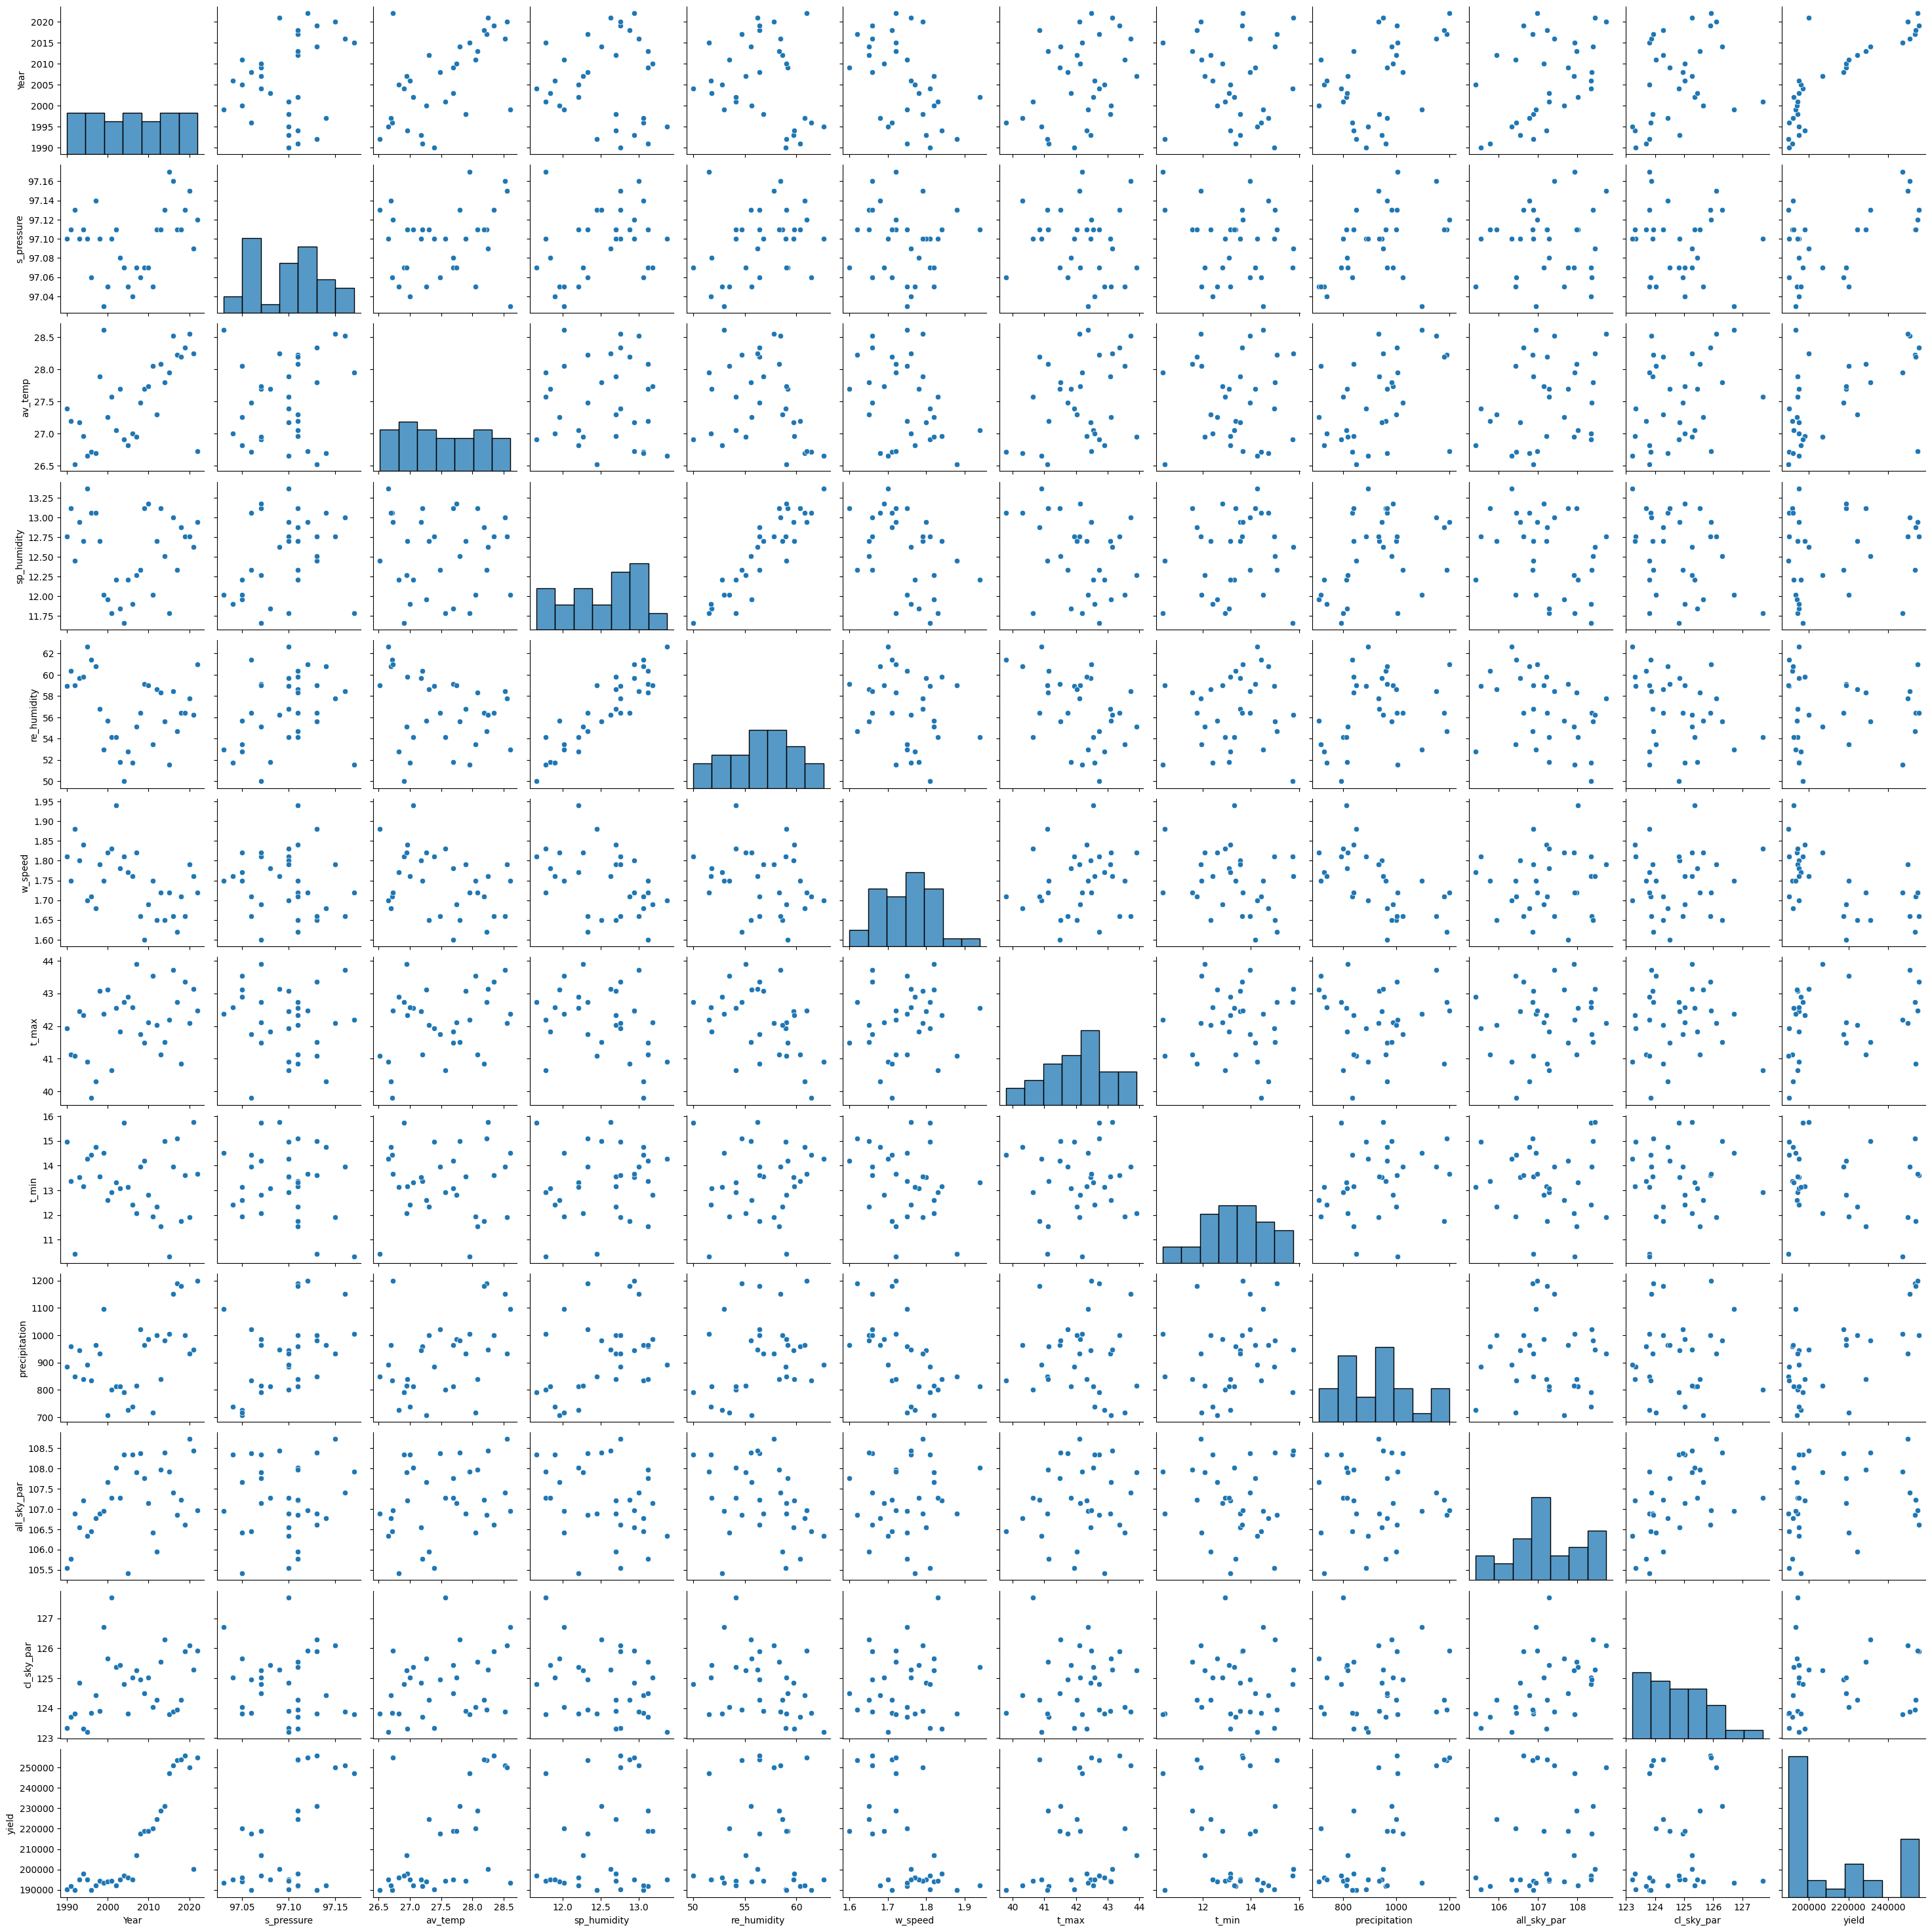

In [5]:
sns.pairplot(data_ad)

Using boxplots to view outliers

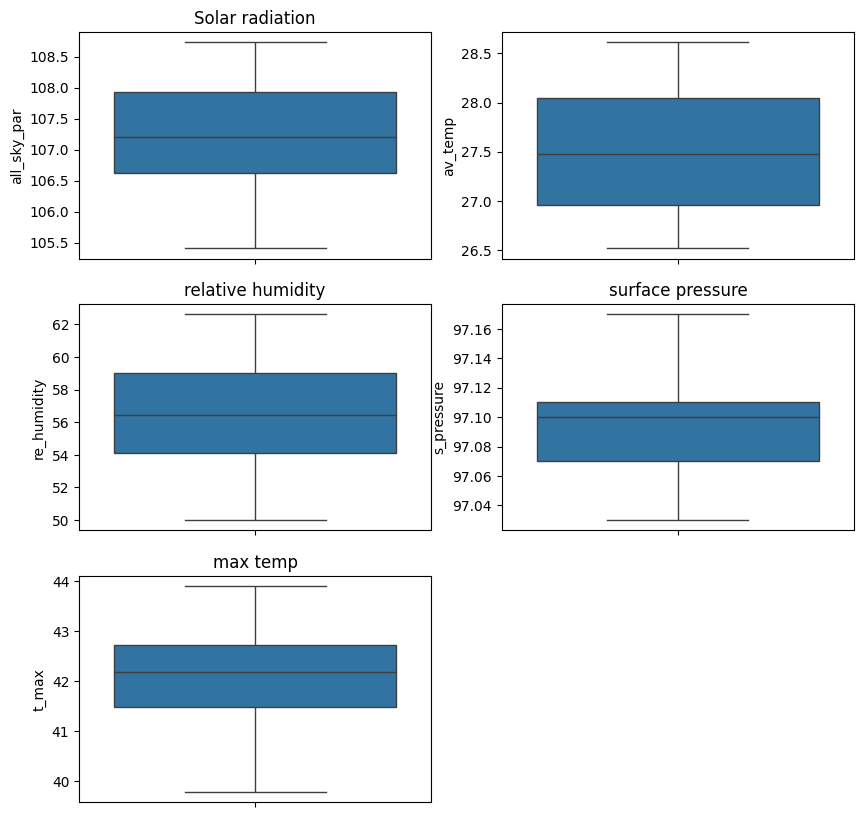

In [6]:
plt.figure(figsize = (10,10))

plt.subplot(3,2,1)
sns.boxplot(data= data_ad['all_sky_par'])
plt.title('Solar radiation')


plt.subplot(3,2,2)
sns.boxplot(data= data_ad['av_temp'])
plt.title('Average Temperature')

plt.subplot(3,2,3)
sns.boxplot(data= data_ad['re_humidity'])
plt.title('relative humidity')

plt.subplot(3,2,4)
sns.boxplot(data= data_ad['s_pressure'])
plt.title('surface pressure')

plt.subplot(3,2,5)
sns.boxplot(data= data_ad['t_max'])
plt.title('max temp')

plt.show()


Line plots for some variables

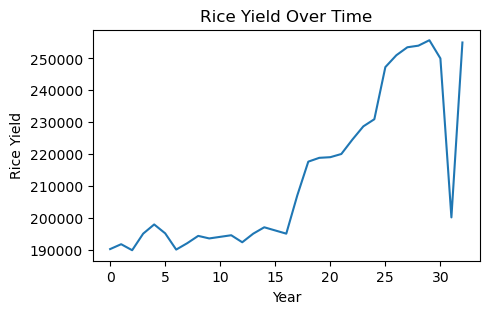

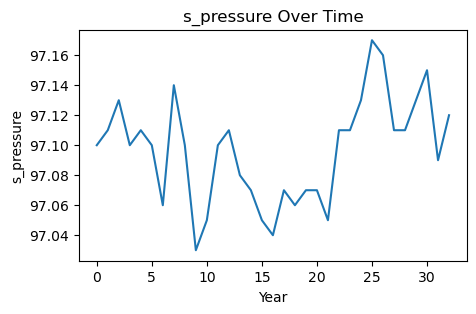

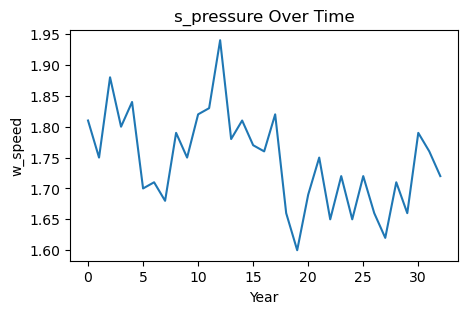

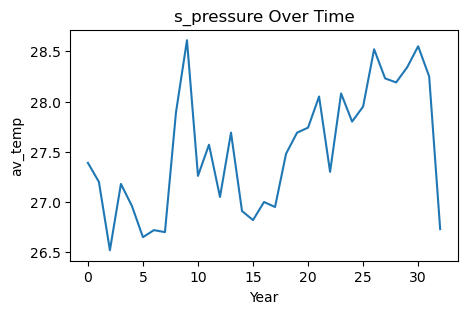

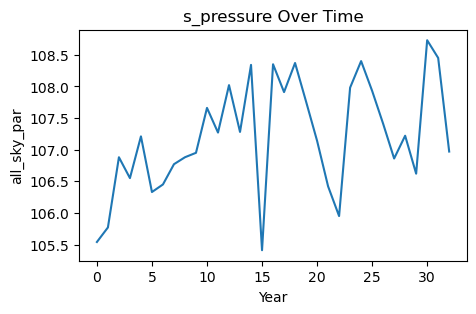

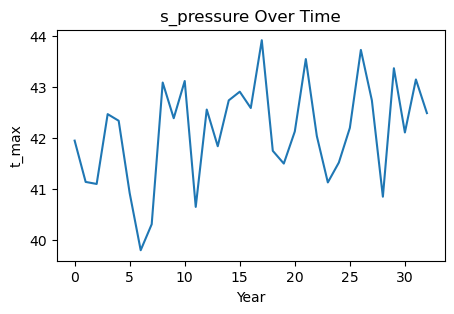

In [ ]:
data_ad["yield"].plot(kind="line", figsize=(5, 3))
plt.xlabel("Year")
plt.ylabel("Rice Yield")
plt.title("Rice Yield Over Time")
plt.show()

data_ad["s_pressure"].plot(kind="line", figsize=(5, 3))
plt.xlabel("Year")
plt.ylabel("s_pressure")
plt.title("s_pressure Over Time")
plt.show()

data_ad["w_speed"].plot(kind="line", figsize=(5, 3))
plt.xlabel("Year")
plt.ylabel("w_speed")
plt.title("s_pressure Over Time")
plt.show()

data_ad["av_temp"].plot(kind="line", figsize=(5, 3))
plt.xlabel("Year")
plt.ylabel("av_temp")
plt.title("s_pressure Over Time")
plt.show()

data_ad["all_sky_par"].plot(kind="line", figsize=(5, 3))
plt.xlabel("Year")
plt.ylabel("all_sky_par")
plt.title("s_pressure Over Time")
plt.show()

data_ad["t_max"].plot(kind="line", figsize=(5, 3))
plt.xlabel("Year")
plt.ylabel("t_max")
plt.title("s_pressure Over Time")
plt.show()

Correlation matrix

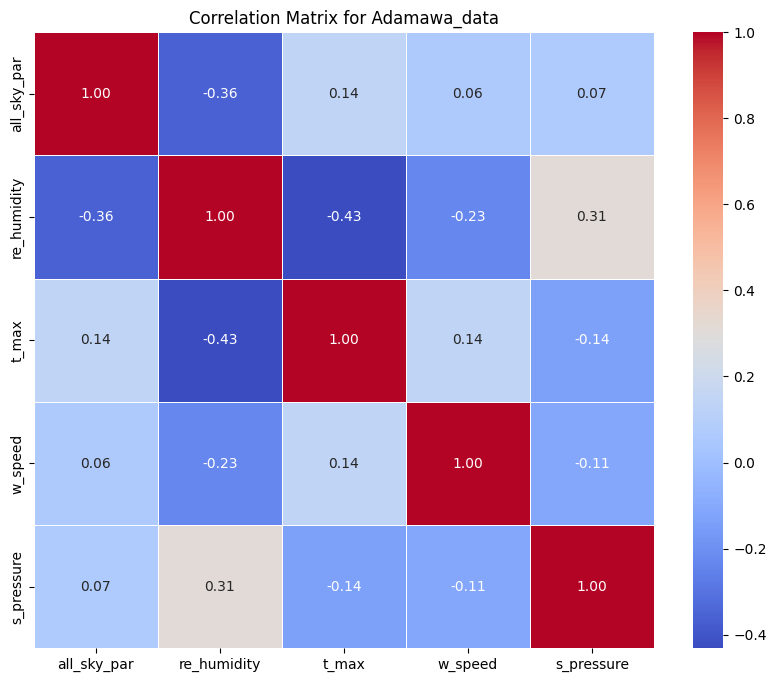

In [7]:
correlation_matrix = data_ad[['all_sky_par', 're_humidity', 't_max', 'w_speed', 's_pressure']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Adamawa_data')
plt.show()

Part of the Preprocessing phase(the other part was carried out using MS Excel)

In [49]:
#converting year column to date and index
data_ad['Year'] = pd.to_datetime(data_ad['Year'], format='%Y')
data_ad.set_index(data_ad['Year'].dt.strftime('%Y'), inplace=True)

In [50]:
#seperating features from target variable
#X = data_ad.drop(['yield'], axis=1)  # Features
X = data_ad[['all_sky_par', 're_humidity', 't_max', 'w_speed', 's_pressure']]
#X = data_ad.drop(['yield'], axis=1)
y = data_ad['yield']
#scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# spliting the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=244)

Viewing the training and testing set

In [51]:
X_train #Adamawa

array([[-0.29284892, -1.15619856,  0.26786163,  0.05965075, -1.93101361],
       [-0.37309578,  0.71779714, -1.03235155,  1.76566229,  0.9655068 ],
       [ 0.93378162, -0.80638603,  0.43920755,  2.55305224,  0.38620272],
       [-0.86604077,  1.47988872, -2.34264389, -0.46527587, -1.06205749],
       [ 0.00521083,  0.97078656,  0.21746577,  1.24073567,  0.38620272],
       [ 1.31208824, -1.54661433,  0.46944507,  0.19088241, -1.64136157],
       [ 0.07399386, -0.80638603, -1.48591428,  1.10950401,  0.09655068],
       [ 0.80767942, -0.49405341,  1.80997493,  0.97827235, -0.77240544],
       [-0.90043228, -1.00003225,  1.43704557,  0.05965075, -1.35170953],
       [-1.64558167,  1.14881615, -0.99203486,  0.05965075,  0.38620272],
       [ 1.36940742, -0.3378871 , -0.60902633, -1.25266582,  0.9655068 ],
       [ 0.63572186,  0.75527705, -0.62918467, -1.9088241 , -0.77240544],
       [-0.07503602,  0.71779714,  0.00580316, -0.72773919, -0.77240544],
       [-1.43923261,  0.59911074, -0.0

**Training the Linear Rigression**

In [53]:
# Training the model
model = LinearRegression()

model.fit(X_train, y_train)

# Testing the model
pred = model.predict(X_test)

mse = mean_squared_error(y_test, pred)
print("Mean Squared Error:", mse)

#Creating a dataframe 'Model_perf' to tabulate the values for each of the matrices used
Model_perf = pd.DataFrame(columns=['Model_Name','MSE','R2_Score', 'MAE', 'RMSE', 'MAPE'])

# Evaluating the model
LR_mse = mean_squared_error(y_test, pred)
LR_R2 = r2_score(y_test, pred)
LR_mae = mean_absolute_error(y_test, pred)
LR_rmse = sqrt(LR_mse)
LR_mape = calculateMape(y_test, pred)

#Adding a row for the evaluation of Linear regression model
new_row = {'Model_Name':'Linear Regression','MSE':LR_mse , 'R2_Score': LR_R2, 'MAE' :LR_mae, 'RMSE' :LR_rmse, 'MAPE':LR_mape}
Model_perf.loc[0] = new_row

Mean Squared Error: 57816496.03888893


In [54]:
print(r2_score(y_test, pred))

0.9031428196199345


In [55]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
print(comparison_df.head())

         Actual      Predicted
Year                          
2013  228675.06  215755.725048
2008  217600.00  216015.368758
2003  195000.00  205156.645042
2015  247275.27  251405.907949
1990  190160.00  194197.675968


**Polynomial Regression**

In [64]:
# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_train)

# Train the polynomial regression model
poly_regression = LinearRegression()
poly_regression.fit(X_poly, y_train)

# Predict using the trained model(testing the model)
X_test_poly = poly_features.transform(X_test)
y_pred = poly_regression.predict(X_test_poly)
print("Predicted values:", y_pred)

#Evaluating the model
PR_mse = mean_squared_error(y_test, y_pred)
PR_R2 = r2_score(y_test, y_pred)
PR_mae = mean_absolute_error(y_test, y_pred)
PR_rmse = sqrt(PR_mse)
PR_mape = calculateMape(y_test, y_pred)

#Adding the new row to the Model_perf table for polynomial regression evaluation
new_row1 = {'Model_Name':'Polynomial Regression','MSE':PR_mse , 'R2_Score': PR_R2, 'MAE' :PR_mae, 'RMSE' :PR_rmse, 'MAPE':PR_mape}
Model_perf.loc[1] = new_row1

Predicted values: [ 332100.1764679  -358367.22691345  642899.81648254  125191.52944946
  162266.99897766  153545.00642395  255094.78710938]


**Decision tree model and evaluation**

In [57]:
#Training the model
rice_tree_model = DecisionTreeRegressor(random_state=1)
# Fit the model

rice_tree_model.fit(X_train,y_train)

#Testing the model
prediction = rice_tree_model.predict(X_test)

DT_mse = mean_squared_error(y_test,prediction)
DT_R2 = r2_score(y_test,prediction)
DT_mae = mean_absolute_error(y_test, prediction)
DT_rmse = sqrt(DT_mse)
DT_mape = calculateMape(y_test, prediction)

#Adding the new row to the Model_perf table for Decision tree evaluation
new_row2 = {'Model_Name':'Decision Tree','MSE':DT_mse , 'R2_Score': DT_R2, 'MAE' :DT_mae, 'RMSE' :DT_rmse, 'MAPE':DT_mape}
Model_perf.loc[2] = new_row2

**Using Random forests regressor**

In [58]:
#Training the model
rice_forest_model = RandomForestRegressor(n_estimators=50, random_state=42)

#y_train = y_train.ravel()

rice_forest_model.fit(X_train,y_train)

# Testing the model
predicted_values = rice_forest_model.predict(X_test)

#Evaluating the model
RF_mse = mean_squared_error(y_test,predicted_values)
RF_R2 = r2_score(y_test, predicted_values)
RF_mae = mean_absolute_error(y_test, predicted_values)
RF_rmse = sqrt(RF_mse)
RF_mape = calculateMape(y_test, predicted_values)

#Adding the new row to the Model_perf table for Random Forest evaluation
new_row3 = {'Model_Name':'Random Forests','MSE':RF_mse , 'R2_Score': RF_R2, 'MAE' :RF_mae, 'RMSE' :RF_rmse, 'MAPE':RF_mape}
Model_perf.loc[3] = new_row3

**Building Support Vector Regressor**

In [59]:
#Training the model
svr_model = SVR(kernel='rbf', C=0.1, gamma=10)  # Choosing the appropriate kernel ( 'linear', 'rbf', 'poly', etc.)
svr_model.fit(X_train, y_train)

#Testing the model
predicted = svr_model.predict(X_test)

#Evaluating the model
SVR_mse = mean_squared_error(y_test,predicted)
SVR_R2 = r2_score(y_test,predicted)
SVR_mae = mean_absolute_error(y_test, predicted)
SVR_rmse = sqrt(SVR_mse)
SVR_mape = calculateMape(y_test, predicted)

#Adding the new row to the Model_perf table for SVR evaluation
new_row4 = {'Model_Name':'Support Vector Regression','MSE':SVR_mse , 'R2_Score': SVR_R2, 'MAE' :SVR_mae, 'RMSE' :SVR_rmse, 'MAPE':SVR_mape}
Model_perf.loc[4] = new_row4

**Using LSTM**

In [60]:
# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 20% for testing
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)  # Split train data further for validation (25% of training data)

# Building the LSTM Layers
model = keras.Sequential()
model.add(LSTM(units=20, return_sequences=True, input_shape=(5, 1)))  # First LSTM layer
model.add(LSTM(units=32))  # Second LSTM layer
model.add(Dense(units=1))  # Output layer for regression

# Compiling the model
model.compile(loss="mse", optimizer="adam", metrics=['mae'])

# Define train_data and val_data
train_data = (X_train, y_train)
val_data = (X_val, y_val)
test_data = (X_test, y_test)

# Train the model
model.fit(train_data[0], train_data[1], epochs=20, validation_data=val_data)  # Adjust epochs as needed

# Evaluate the model on test data
loss, mae = model.evaluate(test_data[0], test_data[1])
print(f"Test Loss: {loss:.4f}, Mean Absolute Error: {mae:.4f}")

# Make predictions on new data
predictor = model.predict(X_test)

#Evaluating the model
LSTM_mse = mean_squared_error(y_test, predictor)
LSTM_R2 = r2_score(y_test, predictor)
LSTM_mae = mean_absolute_error(y_test, predictor)
LSTM_rmse = sqrt(LSTM_mse)
LSTM_mape = calculateMape(y_test, predictor)

#Adding the new row to the Model_perf table for LSTM evaluation
new_row5 = {'Model_Name':'LSTM','MSE':LSTM_mse , 'R2_Score': LSTM_R2, 'MAE' :LSTM_mae, 'RMSE' :LSTM_rmse, 'MAPE':LSTM_mape}
Model_perf.loc[5] = new_row5

Epoch 1/20
1/1 [==============================] - 17s 17s/step - loss: 45697056768.0000 - mae: 212289.5312 - val_loss: 48843796480.0000 - val_mae: 219968.7969
Epoch 2/20
1/1 [==============================] - 0s 78ms/step - loss: 45697036288.0000 - mae: 212289.4688 - val_loss: 48843771904.0000 - val_mae: 219968.7344
Epoch 3/20
1/1 [==============================] - 0s 81ms/step - loss: 45697011712.0000 - mae: 212289.4062 - val_loss: 48843751424.0000 - val_mae: 219968.6719
Epoch 4/20
1/1 [==============================] - 0s 87ms/step - loss: 45696987136.0000 - mae: 212289.3438 - val_loss: 48843730944.0000 - val_mae: 219968.6250
Epoch 5/20
1/1 [==============================] - 0s 96ms/step - loss: 45696962560.0000 - mae: 212289.2969 - val_loss: 48843698176.0000 - val_mae: 219968.5469
Epoch 6/20
1/1 [==============================] - 0s 89ms/step - loss: 45696933888.0000 - mae: 212289.2500 - val_loss: 48843681792.0000 - val_mae: 219968.5000
Epoch 7/20
1/1 [==============================

In [65]:
Model_perf

,Model_Name,MSE,R2_Score,MAE,RMSE,MAPE
0,Linear Regression,5.781650e+07,0.903143,6211.029384,7603.715936,2.804602
1,Polynomial Regression,6.985214e+10,-189.419214,181194.067446,264295.556179,85.455280
2,Decision Tree,1.820654e+08,0.694995,8221.547143,13493.160431,3.395051
3,Random Forests,5.889005e+07,0.901344,5461.879000,7673.985520,2.356664
4,Support Vector Regression,1.045834e+09,-0.752036,24379.475714,32339.362564,10.239843
5,LSTM,4.390988e+10,-118.699761,208669.703722,209546.841346,99.999167


In [52]:
#A function for calculating the MAPE value
def calculateMape(test_y, pred_y):
    # Convert to NumPy array for element-wise operations
    test_y = np.array(test_y)
    pred_y = np.array(pred_y)

    # Calculate absolute percentage errors
    absolute_percentage_errors = np.abs((test_y - pred_y) / test_y)

    # Replace any potential division by zero with NaN
    absolute_percentage_errors[np.isnan(absolute_percentage_errors)] = 0

    # Calculate Mean Absolute Percentage Error (MAPE)
    mape = np.mean(absolute_percentage_errors) * 100

    return mape

"XGBoost Regressor"

In [ ]:
### Trying the XGB regressor now

from xgboost import XGBRegressor
XG_boost = XGBRegressor(max_depth = 3,n_estimators = 300 )

XG_boost.fit(X_train , y_train)
y_pred = XG_boost.predict(X_test)
XG_rmse = mean_squared_error(y_test,y_pred)
XG_R2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

new_row = {'Model_Name':'Linear Regression','MSE':LR_mse , 'R2_Score': LR_R2, 'MAE' :mae, 'RMSE' :rmse}
Model_perf = Model_perf.append(new_row,ignore_index = True)

C:\Users\Joey\AppData\Local\Temp\ipykernel_9140\1471169558.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Model_perf = Model_perf.append(new_row,ignore_index = True)


In [ ]:
Feature selection using f-regression

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Create a feature selector
fs = SelectKBest(score_func=f_regression, k=5)

# Fit the feature selector to the data
fs.fit(X_train, y_train)

# Get the selected feature names
selected_features = X_train.columns[fs.get_support()]
print("Selected Features:", selected_features)

Feature Selectio using Random Forest

In [ ]:
rf = RandomForestRegressor(random_state=42)
rfe = RFE(estimator=rf, n_features_to_select= 7, step=1)
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

Parameter Tunning for DecisionTreeRegressor using grid search cross validation

In [ ]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 15, 20, 35, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

# Create the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train, y_train)

# Get the best parameters and the best model
best_params_dt = grid_search_dt.best_params_
best_dt_model = grid_search_dt.best_estimator_

# Use the best model for predictions
y_pred_dt = best_dt_model.predict(X_test)

# Evaluate the performance
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'Best Decision Tree Model Mean Squared Error: {mse_dt}')
print(f'Best Parameters: {best_params_dt}')

Parameter tunning for Random forest using grid search cross validation

In [ ]:

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Use the best model for predictions
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Best Random Forest Model Mean Squared Error: {mse_rf}')
print(f'Best Parameters: {best_params}')

Parameter Tunning for SVR using Grid search Cross-validation

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
grid_search = GridSearchCV(estimator=SVR(kernel='linear'), param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
best_svr_model = grid_search.best_estimator_

print(best_params)
print(best_svr_model)